# Flood Prediction using Machine Learning Model

- This Machine Learning Model uses 3 Machine Learning Algorithms namely KNN Classification, Logistic Regression[LR], Support Vector[SVM] to get the best possible model to predict the floods using Kerala Rainfall Data.

- Used frequency analysis method for probabilistic analysis of flood prediction

## Data Insights

### Importing Required Libraries.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
from matplotlib import pyplot as plt
data = pd.read_csv('kerala.csv')
data.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUALRAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,YES
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,YES
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,YES
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,YES
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,NO


In [2]:
data.tail()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUALRAINFALL,FLOODS
113,KERALA,2014,4.6,10.3,17.9,95.7,251.0,454.4,677.8,733.9,298.8,355.5,99.5,47.2,3046.4,YES
114,KERALA,2015,3.1,5.8,50.1,214.1,201.8,563.6,406.0,252.2,292.9,308.1,223.6,79.4,2600.6,NO
115,KERALA,2016,2.4,3.8,35.9,143.0,186.4,522.2,412.3,325.5,173.2,225.9,125.4,23.6,2176.6,NO
116,KERALA,2017,1.9,6.8,8.9,43.6,173.5,498.5,319.6,531.8,209.5,192.4,92.5,38.1,2117.1,NO
117,KERALA,2018,29.1,52.1,48.6,116.4,183.8,625.4,1048.5,1398.9,423.6,356.1,125.4,65.1,4473.0,YES


# Finding number of missing values

In [3]:
data.isnull().sum()  # cheaking if any colomns is left empty or not.

SUBDIVISION       0
YEAR              0
JAN               0
FEB               0
MAR               0
APR               0
MAY               0
JUN               0
JUL               0
AUG               0
SEP               0
OCT               0
NOV               0
DEC               0
ANNUALRAINFALL    0
FLOODS            0
dtype: int64

# DATASET CHECKOUT 

In [4]:
print(data.shape)

(118, 16)


In [5]:
data.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUALRAINFALL
count,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000
mean,1959.500000,12.218644,15.633898,36.670339,110.330508,228.644915,651.617797,698.220339,430.369492,246.207627,293.207627,162.311017,40.009322,2925.405085
std,34.207699,15.473766,16.406290,30.063862,44.633452,147.548778,186.181363,228.988966,181.980463,121.901131,93.705253,83.200485,36.676330,452.169407
min,1901.000000,0.000000,0.000000,0.100000,13.100000,53.400000,196.800000,167.500000,178.600000,41.300000,68.500000,31.500000,0.100000,2068.800000
25%,1930.250000,2.175000,4.700000,18.100000,74.350000,125.050000,535.550000,533.200000,316.725000,155.425000,222.125000,93.025000,10.350000,2613.525000
50%,1959.500000,5.800000,8.350000,28.400000,110.400000,184.600000,625.600000,691.650000,386.250000,223.550000,284.300000,152.450000,31.100000,2934.300000
75%,1988.750000,18.175000,21.400000,49.825000,136.450000,264.875000,786.975000,832.425000,500.100000,334.500000,355.150000,218.325000,54.025000,3170.400000
max,2018.000000,83.500000,79.000000,217.200000,238.000000,738.800000,1098.200000,1526.500000,1398.900000,526.700000,567.900000,365.600000,202.300000,4473.000000


In [6]:
data.info

<bound method DataFrame.info of     SUBDIVISION  YEAR   JAN   FEB   MAR    APR    MAY     JUN     JUL     AUG  \
0        KERALA  1901  28.7  44.7  51.6  160.0  174.7   824.6   743.0   357.5   
1        KERALA  1902   6.7   2.6  57.3   83.9  134.5   390.9  1205.0   315.8   
2        KERALA  1903   3.2  18.6   3.1   83.6  249.7   558.6  1022.5   420.2   
3        KERALA  1904  23.7   3.0  32.2   71.5  235.7  1098.2   725.5   351.8   
4        KERALA  1905   1.2  22.3   9.4  105.9  263.3   850.2   520.5   293.6   
..          ...   ...   ...   ...   ...    ...    ...     ...     ...     ...   
113      KERALA  2014   4.6  10.3  17.9   95.7  251.0   454.4   677.8   733.9   
114      KERALA  2015   3.1   5.8  50.1  214.1  201.8   563.6   406.0   252.2   
115      KERALA  2016   2.4   3.8  35.9  143.0  186.4   522.2   412.3   325.5   
116     KERALA   2017   1.9   6.8   8.9   43.6  173.5   498.5   319.6   531.8   
117      KERALA  2018  29.1  52.1  48.6  116.4  183.8   625.4  1048.5  1398.9

In [7]:
data.cov()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUALRAINFALL
YEAR,1170.166667,-119.378632,2.176923,-13.207265,132.625641,-301.126068,-1114.149145,-1749.953846,274.983761,448.915812,-96.876496,-370.360256,-155.123504,-3063.344444
JAN,-119.378632,239.437427,4.979192,36.577053,24.039512,163.062403,545.574281,121.970900,24.434163,-214.094844,-50.812451,-14.205421,-50.968209,830.154092
FEB,2.176923,4.979192,269.166362,121.027766,90.585966,-202.129655,165.293580,21.748364,69.442838,132.629654,81.684355,-222.332684,-76.434079,455.913330
MAR,-13.207265,36.577053,121.027766,903.835779,99.315784,-456.721990,106.348567,126.186249,232.033874,527.184758,-64.980285,-81.573089,28.990108,1578.305793
APR,132.625641,24.039512,90.585966,99.315784,1992.145044,-754.490185,606.540393,153.070058,-388.591540,70.336859,473.330962,82.464276,-180.710372,2267.590185
MAY,-301.126068,163.062403,-202.129655,-456.721990,-754.490185,21770.641812,33.929279,-1571.703571,-3340.586652,2101.892304,2725.149056,1165.417193,-638.978371,20997.420795
JUN,-1114.149145,545.574281,165.293580,106.348567,606.540393,33.929279,34663.499937,4047.567071,-492.944239,-1194.576633,20.161145,247.329460,-581.699654,38170.332986
JUL,-1749.953846,121.970900,21.748364,126.186249,153.070058,-1571.703571,4047.567071,52435.946420,6436.876865,5846.347194,541.214459,-543.479371,-113.988396,67508.201520
AUG,274.983761,24.434163,69.442838,232.033874,-388.591540,-3340.586652,-492.944239,6436.876865,33116.888805,2178.762799,-3094.959423,-1706.808293,948.365073,33987.052721
SEP,448.915812,-214.094844,132.629654,527.184758,70.336859,2101.892304,-1194.576633,5846.347194,2178.762799,14859.885839,-369.500828,-280.077350,-49.210243,23610.285602


In [8]:
data.corr()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUALRAINFALL
YEAR,1.000000,-0.225531,0.003879,-0.012842,0.086865,-0.059661,-0.174938,-0.223403,0.044173,0.107655,-0.030223,-0.130129,-0.123643,-0.198048
JAN,-0.225531,1.000000,0.019613,0.078626,0.034807,0.071420,0.189375,0.034423,0.008677,-0.113502,-0.035044,-0.011034,-0.089809,0.118648
FEB,0.003879,0.019613,1.000000,0.245375,0.123706,-0.083500,0.054114,0.005789,0.023259,0.066317,0.053133,-0.162880,-0.127025,0.061457
MAR,-0.012842,0.078626,0.245375,1.000000,0.074014,-0.102961,0.019000,0.018330,0.042411,0.143850,-0.023066,-0.032612,0.026292,0.116103
APR,0.086865,0.034807,0.123706,0.074014,1.000000,-0.114566,0.072990,0.014977,-0.047842,0.012928,0.113172,0.022206,-0.110392,0.112358
MAY,-0.059661,0.071420,-0.083500,-0.102961,-0.114566,1.000000,0.001235,-0.046518,-0.124412,0.116860,0.197102,0.094934,-0.118077,0.314723
JUN,-0.174938,0.189375,0.054114,0.019000,0.072990,0.001235,1.000000,0.094939,-0.014549,-0.052634,0.001156,0.015967,-0.085188,0.453407
JUL,-0.223403,0.034423,0.005789,0.018330,0.014977,-0.046518,0.094939,1.000000,0.154467,0.209441,0.025223,-0.028526,-0.013573,0.651990
AUG,0.044173,0.008677,0.023259,0.042411,-0.047842,-0.124412,-0.014549,0.154467,1.000000,0.098215,-0.181496,-0.112729,0.142090,0.413036
SEP,0.107655,-0.113502,0.066317,0.143850,0.012928,0.116860,-0.052634,0.209441,0.098215,1.000000,-0.032348,-0.027615,-0.011007,0.428344


## Replacing the flood results of yes/no by 1/0

In [9]:
data['FLOODS'].replace(['YES','NO'],[1,0],inplace=True)
data.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUALRAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,1
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,1
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,1
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,1
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,0


In [10]:
data.iloc[0][2:].sum()-3248.6

3249.600000000001

# Separating the data required for prediction.

In [11]:
x=data.iloc[:,1:14]
x.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4
1,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5
2,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0
3,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3
4,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2


In [12]:
# Now seperate the flood label from the dataset.
y=data.iloc[:,-1]
y

0      1
1      1
2      1
3      1
4      0
      ..
113    1
114    0
115    0
116    0
117    1
Name: FLOODS, Length: 118, dtype: int64

# DATA VISUALISATION

In [13]:
copy_df_data = data.copy()

In [14]:
copy_df_data.columns[2:14]

Index(['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT',
       'NOV', 'DEC'],
      dtype='object')

In [15]:
sns.set(style='whitegrid', color_codes=True)

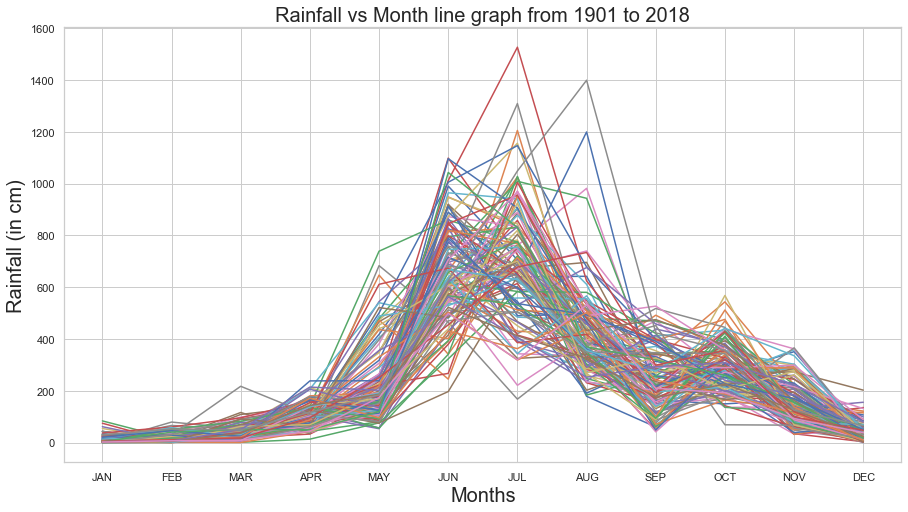

In [16]:
plt.figure(figsize=(15,8))
plt.xlabel("Months",fontsize="20")
plt.ylabel("Rainfall (in cm)",fontsize="20")
plt.title("Rainfall vs Month line graph from 1901 to 2018" ,fontsize="20")
for i in range(118):
    plt.plot( copy_df_data.columns[2:14] ,copy_df_data.iloc[i].values[2:14] )



<AxesSubplot:title={'center':'Annual rainfall vs Year with flood records'}, xlabel='YEAR', ylabel='ANNUALRAINFALL'>

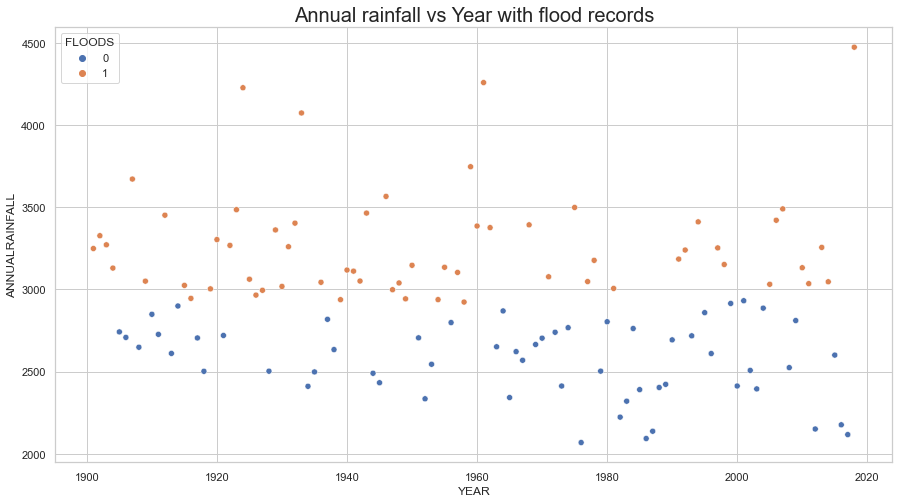

In [17]:
plt.figure(figsize=(15,8))
plt.title("Annual rainfall vs Year with flood records",fontsize="20")
sns.scatterplot(data=data, x="YEAR", y='ANNUALRAINFALL' , hue="FLOODS")

<AxesSubplot:title={'center':'Time series graph with flood records'}, xlabel='YEAR', ylabel='ANNUALRAINFALL'>

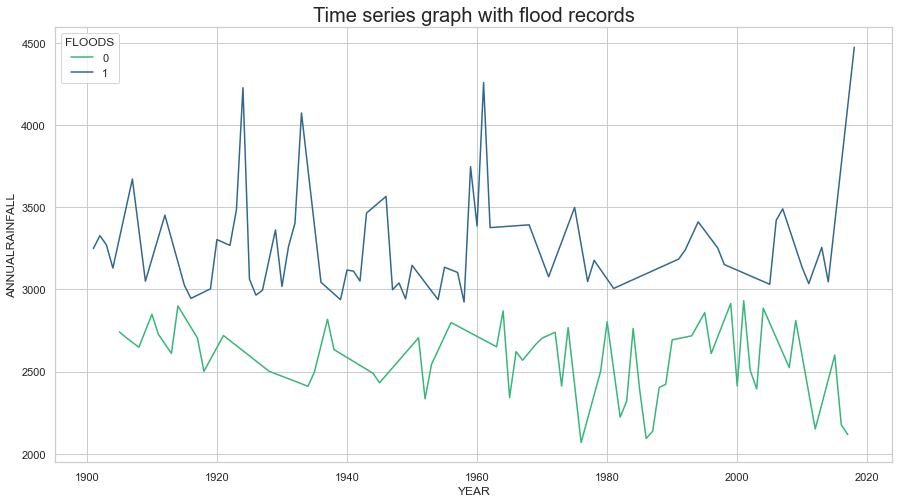

In [18]:
plt.figure(figsize=(15,8))
plt.title("Time series graph with flood records",fontsize="20")
sns.lineplot(data=data , x="YEAR" , y="ANNUALRAINFALL" , hue="FLOODS", palette="viridis_r" )

<AxesSubplot:title={'center':'ANNUAL RAINFALL vs YEAR'}, xlabel='YEAR', ylabel='ANNUALRAINFALL'>

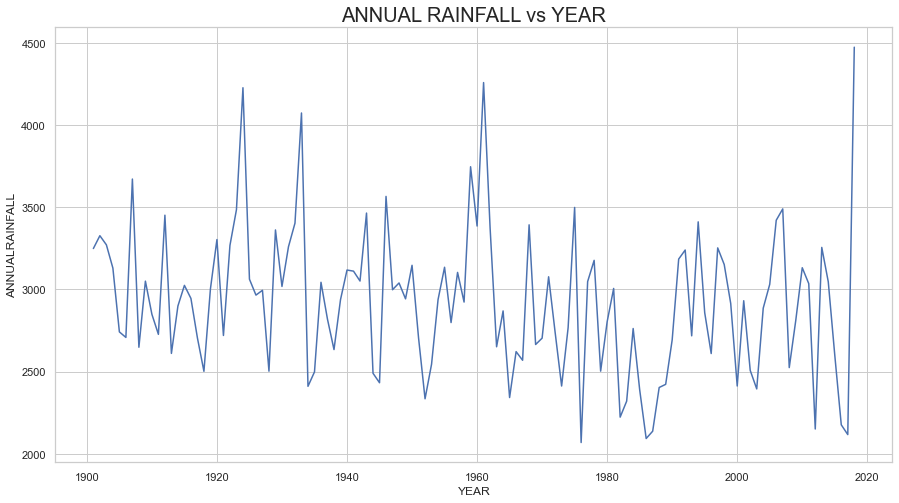

In [19]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,8))
plt.title("ANNUAL RAINFALL vs YEAR",fontsize="20")
sns.lineplot(data=data , x="YEAR" , y="ANNUALRAINFALL", palette="viridis_r" )


# Plotting the Data


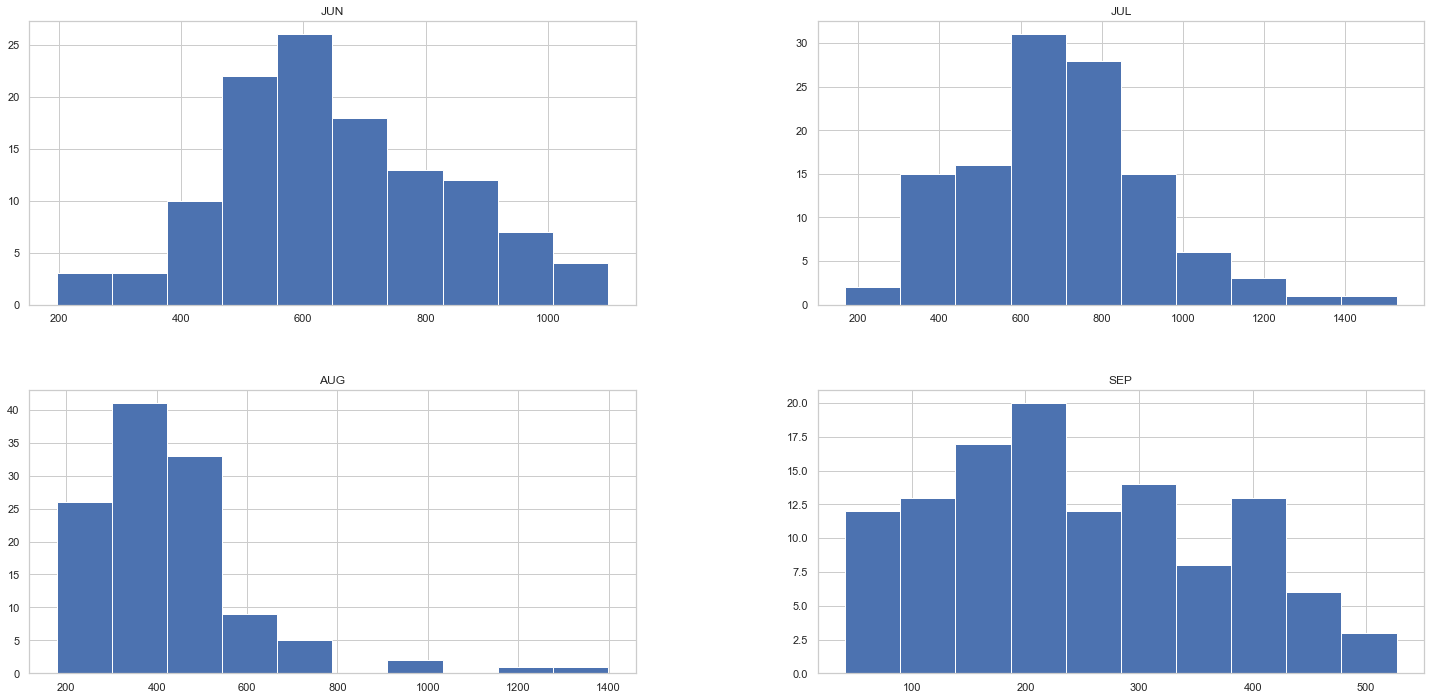

In [20]:
import matplotlib.pyplot as plt   
# sets the backend of matplotlib to the 'inline' backend. 
%matplotlib inline             
c = data[['JUN','JUL','AUG','SEP']]
c.hist(figsize=(25,12))
plt.show()
# How the rainfall index vary during rainy season

<AxesSubplot:xlabel='SEP', ylabel='Count'>

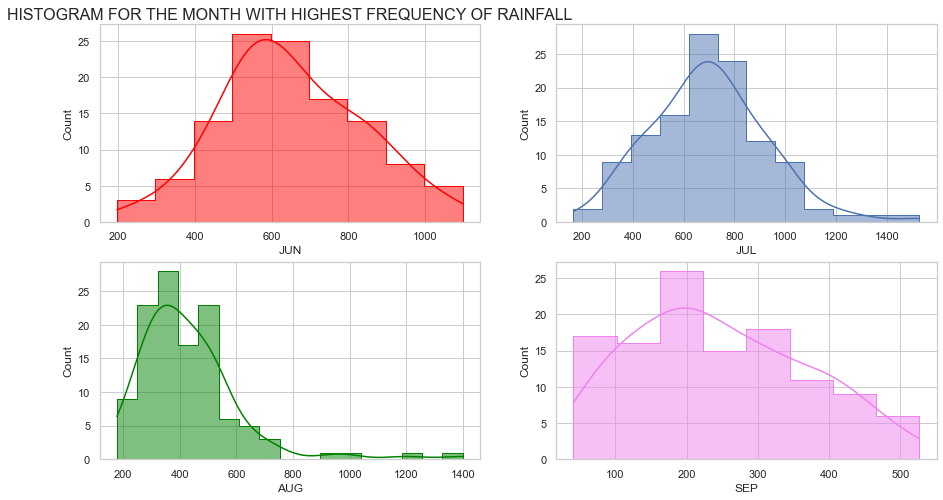

In [21]:

figure, axes = plt.subplots(2, 2, sharex=False, figsize=(15, 8))
sns.histplot(data=data[['JUN']],x="JUN",ax=axes[0,0],kde=True,element="step",color="red").set_title("HISTOGRAM FOR THE MONTH WITH HIGHEST FREQUENCY OF RAINFALL",fontsize="16")
sns.histplot(data=data[['JUL']],  x="JUL" ,ax=axes[0,1] ,kde=True,element="step")
sns.histplot(data=data[['AUG']],  x="AUG" , ax=axes[1,0],kde=True,element="step",color="green")
sns.histplot(data=data[['SEP']], x="SEP", ax=axes[1,1],kde=True,element="step",color="violet")


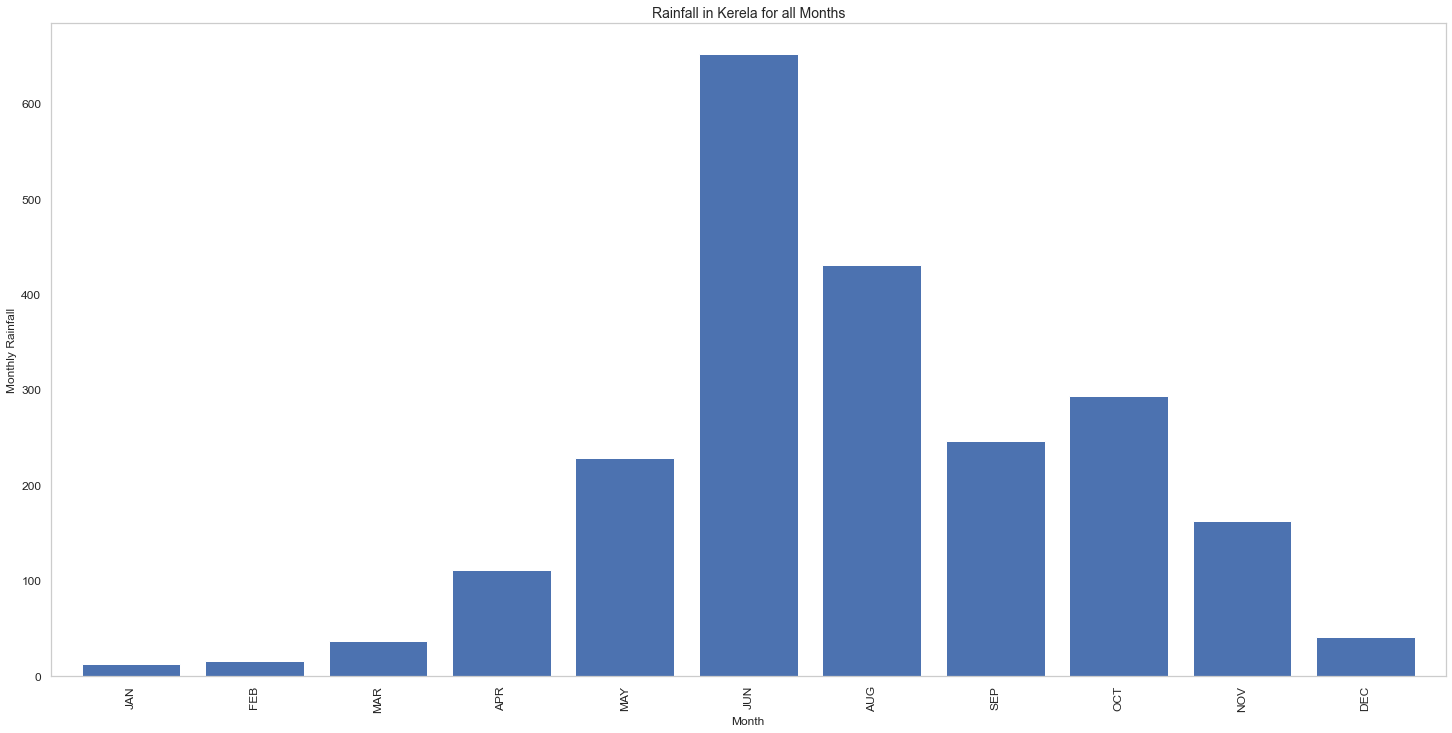

In [22]:
ax = data[['JAN', 'FEB', 'MAR', 'APR','MAY', 'JUN', 'AUG', 'SEP', 'OCT','NOV','DEC']].mean().plot.bar(width=0.8,align='center',figsize=(25,12))
plt.xlabel('Month',fontsize=12)
plt.ylabel('Monthly Rainfall',fontsize=12)
plt.title('Rainfall in Kerela for all Months',fontsize=14)
ax.tick_params(labelsize=12)
plt.grid()
plt.ioff()

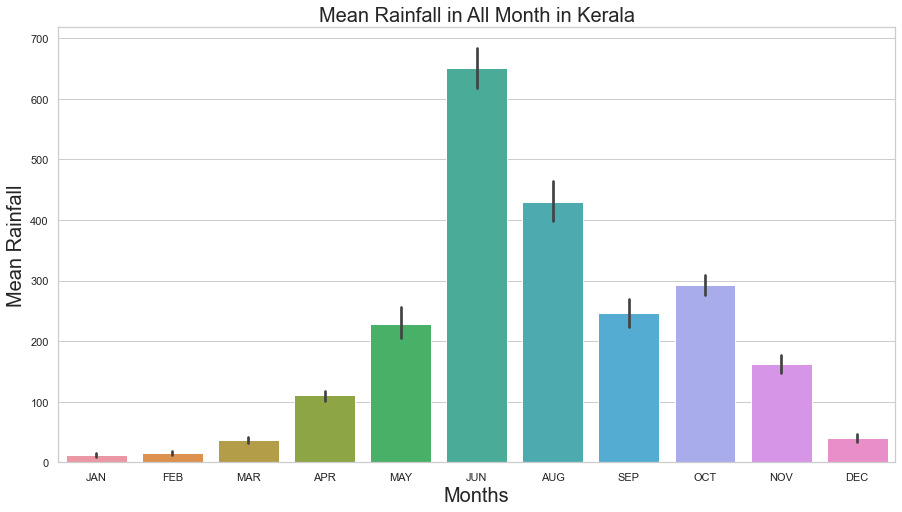

In [23]:
plt.figure(figsize=(15,8))
plt.title("Mean Rainfall in All Month in Kerala",fontsize="20")
plt.ylabel("Mean Rainfall",fontsize="20")
plt.xlabel("Months",fontsize="20")
ax = sns.barplot(data = data[['JAN', 'FEB', 'MAR', 'APR','MAY', 'JUN', 'AUG', 'SEP', 'OCT','NOV','DEC']])
# for i in ax.containers:
#     ax.bar_label(i,)

# RAINFALL DATA REPRESENTATION 

In [24]:
copy_df_data = data.copy()

In [25]:
copy_df_data.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUALRAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,1
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,1
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,1
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,1
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,0


### MOVING AVERAGE OF RAINFALL DATA

The rolling average or moving average is the simple mean of the last ‘n’ values. It can help us in finding trends that would be otherwise hard to detect. Also, they can be used to determine long-term trends. You can simply calculate the rolling average by summing up the previous ‘n’ values and dividing them by ‘n’ itself. But for this, the first (n-1) values of the rolling average would be Nan.

In [26]:
copy_df_data["MOVING_AVG"] = data.ANNUALRAINFALL.rolling(5).mean()

In [27]:
copy_df_data.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUALRAINFALL,FLOODS,MOVING_AVG
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,1,NaN
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,1,NaN
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,1,NaN
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,1,NaN
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,0,3143.54


In [28]:
data["MOVING_AVG_10"] = data.ANNUALRAINFALL.rolling(10).mean()

In [29]:
data["MOVING_AVG_5"] = data.ANNUALRAINFALL.rolling(5).mean()

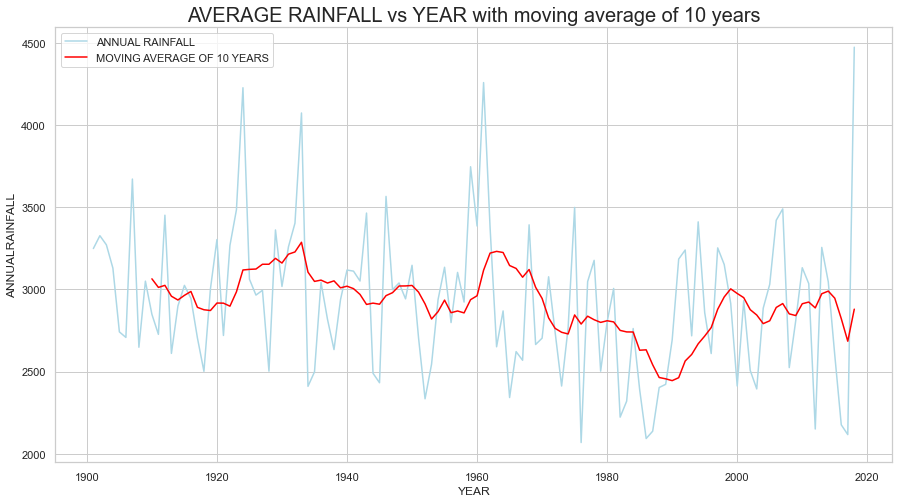

In [30]:
plt.figure(figsize=(15,8))
plt.title("AVERAGE RAINFALL vs YEAR with moving average of 10 years",fontsize="20")
annual = sns.lineplot(x=data["YEAR"] , y=data["ANNUALRAINFALL"],label="ANNUAL RAINFALL" ,color="lightblue")
annual = sns.lineplot(x=data["YEAR"] , y=data["MOVING_AVG_10"], label="MOVING AVERAGE OF 10 YEARS" , color="red")

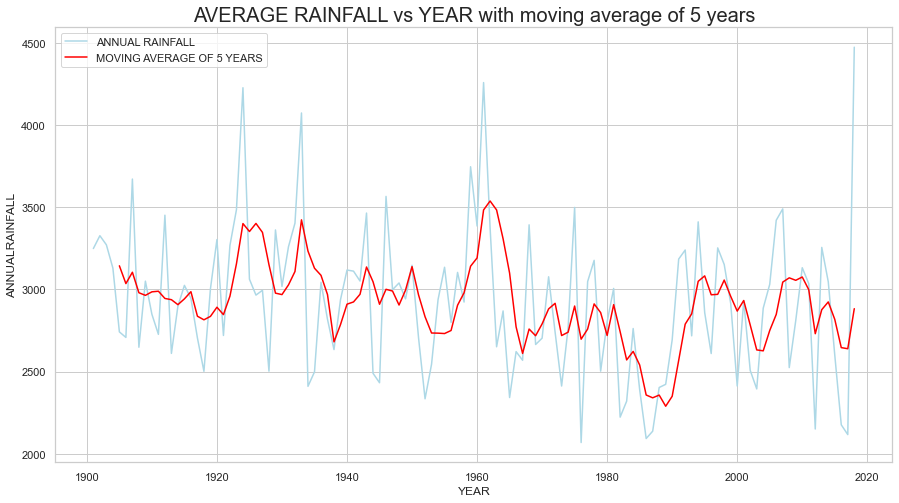

In [31]:
plt.figure(figsize=(15,8))
plt.title("AVERAGE RAINFALL vs YEAR with moving average of 5 years",fontsize="20")
annual = sns.lineplot(x=data["YEAR"] , y=data["ANNUALRAINFALL"],label="ANNUAL RAINFALL" ,color="lightblue")
annual = sns.lineplot(x=data["YEAR"] , y=data["MOVING_AVG_5"], label="MOVING AVERAGE OF 5 YEARS" , color="red")

# PROBABILISTIC PREDICTION - FREQUENCY ANALYSIS

# USING MACHINE LEARNING MODELS

# Using sklearn to develop the ML Model

In [32]:
# Scaling the data between 0 and 1.
from sklearn import preprocessing
minmax = preprocessing.MinMaxScaler(feature_range=(0,1))
minmax.fit(x).transform(x)

array([[0.        , 0.34371257, 0.56582278, ..., 0.39727673, 0.95570189,
        0.2388724 ],
       [0.00854701, 0.08023952, 0.03291139, ..., 0.5804966 , 0.37952709,
        0.60039565],
       [0.01709402, 0.03832335, 0.23544304, ..., 0.57188626, 0.37563604,
        0.29129575],
       ...,
       [0.98290598, 0.02874251, 0.04810127, ..., 0.31517821, 0.28105358,
        0.11622156],
       [0.99145299, 0.02275449, 0.08607595, ..., 0.24809772, 0.18258007,
        0.18793274],
       [1.        , 0.34850299, 0.65949367, ..., 0.57589107, 0.28105358,
        0.3214639 ]])

In [33]:
#dividing the dataset into training dataset and test dataset. 
from sklearn import model_selection,neighbors
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x_train.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
17,1918,42.9,5.0,32.8,51.3,683.0,464.3,167.5,376.0,96.4,233.2,295.4,54.1
107,2008,0.8,30.3,217.2,108.4,81.2,469.9,505.1,349.0,347.0,343.4,55.4,17.0
8,1909,54.1,11.8,61.3,93.8,473.2,704.7,782.3,258.0,195.4,212.1,171.1,32.3
94,1995,10.3,6.5,37.3,134.9,355.6,493.4,702.5,457.3,280.0,198.3,182.6,0.1
95,1996,2.8,9.1,14.4,124.3,74.3,572.4,696.0,327.4,342.7,294.1,89.9,62.5


In [34]:
x_train.dtypes

YEAR      int64
JAN     float64
FEB     float64
MAR     float64
APR     float64
MAY     float64
JUN     float64
JUL     float64
AUG     float64
SEP     float64
OCT     float64
NOV     float64
DEC     float64
dtype: object

In [35]:
data

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUALRAINFALL,FLOODS,MOVING_AVG_10,MOVING_AVG_5
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,1,NaN,NaN
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,1,NaN,NaN
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,1,NaN,NaN
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,1,NaN,NaN
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,0,NaN,3143.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,KERALA,2014,4.6,10.3,17.9,95.7,251.0,454.4,677.8,733.9,298.8,355.5,99.5,47.2,3046.4,1,2989.62,2923.96
114,KERALA,2015,3.1,5.8,50.1,214.1,201.8,563.6,406.0,252.2,292.9,308.1,223.6,79.4,2600.6,0,2946.57,2817.72
115,KERALA,2016,2.4,3.8,35.9,143.0,186.4,522.2,412.3,325.5,173.2,225.9,125.4,23.6,2176.6,0,2822.17,2646.02
116,KERALA,2017,1.9,6.8,8.9,43.6,173.5,498.5,319.6,531.8,209.5,192.4,92.5,38.1,2117.1,0,2684.92,2639.22


In [36]:
x_train

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
17,1918,42.9,5.0,32.8,51.3,683.0,464.3,167.5,376.0,96.4,233.2,295.4,54.1
107,2008,0.8,30.3,217.2,108.4,81.2,469.9,505.1,349.0,347.0,343.4,55.4,17.0
8,1909,54.1,11.8,61.3,93.8,473.2,704.7,782.3,258.0,195.4,212.1,171.1,32.3
94,1995,10.3,6.5,37.3,134.9,355.6,493.4,702.5,457.3,280.0,198.3,182.6,0.1
95,1996,2.8,9.1,14.4,124.3,74.3,572.4,696.0,327.4,342.7,294.1,89.9,62.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,1911,3.0,4.3,18.2,51.0,180.6,990.0,705.3,178.6,60.2,302.3,145.7,87.6
60,1961,13.7,31.3,11.4,94.1,500.5,1005.2,1146.5,678.3,399.3,274.2,85.9,17.5
81,1982,0.7,0.1,21.9,60.4,148.2,612.2,511.5,495.0,70.6,164.4,127.5,10.8
42,1943,83.5,14.6,38.4,107.5,478.4,794.5,831.6,183.3,257.6,427.2,223.4,24.3


In [37]:
y_train

17     0
107    0
8      1
94     0
95     0
      ..
10     0
60     1
81     0
42     1
86     0
Name: FLOODS, Length: 94, dtype: int64

In [38]:
# type casting.
y_train=y_train.astype('int')
y_train

17     0
107    0
8      1
94     0
95     0
      ..
10     0
60     1
81     0
42     1
86     0
Name: FLOODS, Length: 94, dtype: int32

In [39]:
x_test

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
32,1933,1.0,9.3,36.9,139.5,738.8,859.3,773.4,479.5,469.7,397.0,126.1,42.3
79,1980,0.0,0.9,20.8,114.8,105.3,745.9,754.0,438.1,139.5,282.3,162.3,39.5
20,1921,43.0,4.7,15.0,171.3,104.1,489.1,639.8,641.9,156.7,302.4,136.2,15.8
37,1938,0.3,79.0,53.3,164.5,179.6,681.6,648.6,287.9,223.2,223.7,69.5,22.9
33,1934,74.5,1.7,47.7,92.4,106.7,852.9,415.0,337.2,48.4,335.9,93.4,4.9
34,1935,23.9,8.3,18.1,120.7,56.6,431.3,687.3,280.9,283.3,403.8,153.0,30.9
18,1919,43.0,6.1,33.9,65.9,247.0,636.8,648.0,484.2,255.9,249.2,280.1,53.0
59,1960,9.4,8.4,44.4,206.6,540.0,480.3,750.9,336.8,371.2,255.9,358.0,23.7
112,2013,3.9,40.1,49.9,49.3,119.3,1042.7,830.2,369.7,318.6,259.9,154.9,17.0
38,1939,13.6,3.6,24.9,172.8,105.1,625.8,749.6,459.9,134.1,339.8,298.1,10.2


In [40]:
y_test=y_test.astype('int')
y_test

32     1
79     0
20     0
37     0
33     0
34     0
18     1
59     1
112    1
38     1
63     0
66     0
2      1
91     1
71     0
23     1
40     1
106    1
29     1
16     0
116    0
65     0
56     1
9      0
Name: FLOODS, dtype: int32

# Using Prediction Algorithms:

## KNN classifier to predict

In [41]:
clf=neighbors.KNeighborsClassifier()
clf.fit(x_train,y_train)

KNeighborsClassifier()

In [42]:
# Predicted chance of Flood.
print("Predicted Values for the Floods:")
y_predict=clf.predict(x_test)
y_predict

Predicted Values for the Floods:


array([1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1])

In [43]:
print("0 is for 'NO FLOOD'")
print("1 is for 'FLOOD IS THERE' ")
df_predict_compr = {"Actual Flood Record":y_test,"Predicted Flood Result":y_predict}
knn_predict_actual = pd.DataFrame(df_predict_compr)
knn_predict_actual.reset_index()

0 is for 'NO FLOOD'
1 is for 'FLOOD IS THERE' 


,index,Actual Flood Record,Predicted Flood Result
0,32,1,1
1,79,0,0
2,20,0,0
3,37,0,0
4,33,0,0
5,34,0,0
6,18,1,1
7,59,1,1
8,112,1,1
9,38,1,1


In [44]:
print("Actual Values for the Floods:")
print(y_test)

Actual Values for the Floods:
32     1
79     0
20     0
37     0
33     0
34     0
18     1
59     1
112    1
38     1
63     0
66     0
2      1
91     1
71     0
23     1
40     1
106    1
29     1
16     0
116    0
65     0
56     1
9      0
Name: FLOODS, dtype: int32


In [45]:
print("List of the Predicted Values:")
print(y_predict)

List of the Predicted Values:
[1 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1 1 1 0 0 0 0 1 1]


In [46]:
plt.figure(figsize=(15,8))
sns.scatterplot( y=knn_predict_actual["Actual Flood Record"], x=knn_predict_actual["index"] , sizes=(20, 200), legend="full")

KeyError: 'index'

<Figure size 1080x576 with 0 Axes>

In [ ]:
# Scaling the dataset.
from sklearn.model_selection import cross_val_score,cross_val_predict
x_train_std= minmax.fit_transform(x_train)
x_test_std= minmax.fit_transform(x_test)
knn_acc=cross_val_score(clf,x_train_std,y_train,cv=3,scoring='accuracy',n_jobs=-1)
knn_proba=cross_val_predict(clf,x_train_std,y_train,cv=3,method='predict_proba')

In [ ]:
knn_acc

array([0.71875   , 0.64516129, 0.77419355])

In [ ]:
knn_proba

array([[0. , 1. ],
       [0.6, 0.4],
       [0.4, 0.6],
       [0. , 1. ],
       [0.4, 0.6],
       [0.2, 0.8],
       [0.6, 0.4],
       [0.6, 0.4],
       [0.2, 0.8],
       [0.6, 0.4],
       [0.6, 0.4],
       [0.6, 0.4],
       [0.4, 0.6],
       [0.4, 0.6],
       [0.6, 0.4],
       [0.4, 0.6],
       [0.8, 0.2],
       [0.6, 0.4],
       [0.8, 0.2],
       [1. , 0. ],
       [0.6, 0.4],
       [0.8, 0.2],
       [1. , 0. ],
       [0.4, 0.6],
       [0.8, 0.2],
       [1. , 0. ],
       [0.2, 0.8],
       [0.6, 0.4],
       [0.4, 0.6],
       [0.8, 0.2],
       [0.6, 0.4],
       [0.2, 0.8],
       [0.8, 0.2],
       [0. , 1. ],
       [0.2, 0.8],
       [0.8, 0.2],
       [0.8, 0.2],
       [0.6, 0.4],
       [0.4, 0.6],
       [0.6, 0.4],
       [0.2, 0.8],
       [0.6, 0.4],
       [0.2, 0.8],
       [0.2, 0.8],
       [0.8, 0.2],
       [0.2, 0.8],
       [1. , 0. ],
       [0.6, 0.4],
       [0.4, 0.6],
       [0.6, 0.4],
       [0.8, 0.2],
       [0.4, 0.6],
       [1. ,

### How accurate is our model?

In [ ]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\nAccuracy Score:%f"%(accuracy_score(y_test,y_predict)*100))
print("Recall Score:%f"%(recall_score(y_test,y_predict)*100))
print("ROC score:%f"%(roc_auc_score(y_test,y_predict)*100))
print(confusion_matrix(y_test,y_predict))


Accuracy Score:91.666667
Recall Score:92.307692
ROC score:91.608392
[[10  1]
 [ 1 12]]


## Logistic Regression to predict

In [ ]:
x_train_std = minmax.fit_transform(x_train)         # fit the values in between 0 and 1.
y_train_std = minmax.transform(x_test)

from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr_acc = cross_val_score(lr,x_train_std,y_train,cv=3,scoring='accuracy',n_jobs=-1)
lr_proba = cross_val_predict(lr,x_train_std,y_train,cv=3,method='predict_proba')

C:\Users\HIMANGSHUB\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
lr_acc

array([0.90625   , 0.83870968, 0.77419355])

In [ ]:
lr_proba[:20]

array([[0.40521047, 0.59478953],
       [0.33890187, 0.66109813],
       [0.32859972, 0.67140028],
       [0.11738313, 0.88261687],
       [0.38374341, 0.61625659],
       [0.32685233, 0.67314767],
       [0.29661233, 0.70338767],
       [0.35199383, 0.64800617],
       [0.20262238, 0.79737762],
       [0.52233083, 0.47766917],
       [0.56465699, 0.43534301],
       [0.4821611 , 0.5178389 ],
       [0.42793164, 0.57206836],
       [0.50381713, 0.49618287],
       [0.67861875, 0.32138125],
       [0.44049752, 0.55950248],
       [0.55068858, 0.44931142],
       [0.53025172, 0.46974828],
       [0.67433939, 0.32566061],
       [0.74139678, 0.25860322],
       [0.48940233, 0.51059767],
       [0.63924791, 0.36075209],
       [0.7948182 , 0.2051818 ],
       [0.51404917, 0.48595083],
       [0.60749775, 0.39250225],
       [0.60010191, 0.39989809],
       [0.28966555, 0.71033445],
       [0.53633646, 0.46366354],
       [0.22132355, 0.77867645],
       [0.62949229, 0.37050771],
       [0.

In [ ]:
y_pred=lr.predict(x_test)
y_pred

array([0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1])

In [ ]:
print(y_test.values)

[0 0 1 0 1 0 1 1 0 0 0 1 1 1 1 1 1 0 0 1 0 1 0 1]


In [ ]:
print("List of the Predicted Values:")
print(y_pred)

List of the Predicted Values:
[0 1 1 0 1 0 1 1 0 0 0 1 1 1 1 1 1 0 0 1 0 1 0 1]


### Accuracy and Efficiency of our Model 

In [ ]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\naccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))
print("recall score:%f"%(recall_score(y_test,y_pred)*100))
print("roc score:%f"%(roc_auc_score(y_test,y_pred)*100))
print(confusion_matrix(y_test,y_pred))


accuracy score:95.833333
recall score:100.000000
roc score:95.454545
[[10  1]
 [ 0 13]]


## Support Vector Classification to predict

In [ ]:
from sklearn.svm import SVC
svc=SVC(kernel='rbf',probability=True)
svc_classifier=svc.fit(x_train,y_train)
svc_acc=cross_val_score(svc_classifier,x_train_std,y_train,cv=3,scoring="accuracy",n_jobs=-1)
svc_proba=cross_val_predict(svc_classifier,x_train_std,y_train,cv=3,method='predict_proba')

In [ ]:
svc_acc

array([0.875     , 0.80645161, 0.77419355])

In [ ]:
svc_proba

array([[0.10764263, 0.89235737],
       [0.22580518, 0.77419482],
       [0.20877961, 0.79122039],
       [0.00806563, 0.99193437],
       [0.12467624, 0.87532376],
       [0.03747401, 0.96252599],
       [0.06643352, 0.93356648],
       [0.1481034 , 0.8518966 ],
       [0.10524994, 0.89475006],
       [0.62110715, 0.37889285],
       [0.56252722, 0.43747278],
       [0.38626149, 0.61373851],
       [0.37923833, 0.62076167],
       [0.41565043, 0.58434957],
       [0.83275769, 0.16724231],
       [0.34506346, 0.65493654],
       [0.78971425, 0.21028575],
       [0.28657462, 0.71342538],
       [0.95895403, 0.04104597],
       [0.97930243, 0.02069757],
       [0.54350145, 0.45649855],
       [0.807207  , 0.192793  ],
       [0.97403454, 0.02596546],
       [0.62643652, 0.37356348],
       [0.85082113, 0.14917887],
       [0.9408122 , 0.0591878 ],
       [0.07894405, 0.92105595],
       [0.80459171, 0.19540829],
       [0.20665361, 0.79334639],
       [0.87443068, 0.12556932],
       [0.

In [ ]:
svc_scores=svc_proba[:,1]
svc_scores

array([0.89235737, 0.77419482, 0.79122039, 0.99193437, 0.87532376,
       0.96252599, 0.93356648, 0.8518966 , 0.89475006, 0.37889285,
       0.43747278, 0.61373851, 0.62076167, 0.58434957, 0.16724231,
       0.65493654, 0.21028575, 0.71342538, 0.04104597, 0.02069757,
       0.45649855, 0.192793  , 0.02596546, 0.37356348, 0.14917887,
       0.0591878 , 0.92105595, 0.19540829, 0.79334639, 0.12556932,
       0.53621889, 0.90119031, 0.44074651, 0.97818682, 0.87706313,
       0.66388058, 0.27170494, 0.61120629, 0.91147542, 0.6046576 ,
       0.91366916, 0.42242959, 0.46321256, 0.99349001, 0.29858887,
       0.92209631, 0.26742174, 0.33247556, 0.79797932, 0.89889172,
       0.08510939, 0.80004546, 0.03500243, 0.87431927, 0.0476346 ,
       0.92318584, 0.08566035, 0.18045752, 0.70904364, 0.6861489 ,
       0.74966368, 0.45671187, 0.0458869 , 0.27163076, 0.7210925 ,
       0.47976942, 0.01732473, 0.02419686, 0.01330991, 0.523551  ,
       0.66894421, 0.99127157, 0.46921672, 0.81656094, 0.52318

In [ ]:
y_pred=svc_classifier.predict(x_test)
print("Actual Flood Values:")
print(y_test.values)

Actual Flood Values:
[0 0 1 0 1 0 1 1 0 0 0 1 1 1 1 1 1 0 0 1 0 1 0 1]


In [ ]:
print("Predicted Flood Values:")
print(y_pred)

Predicted Flood Values:
[0 1 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0 0 0 1 0 1 0 1]


### Accuracy of our model

In [ ]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\naccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))
print("recall score:%f"%(recall_score(y_test,y_pred)*100))
print("roc score:%f"%(roc_auc_score(y_test,y_pred)*100))
print(confusion_matrix(y_test,y_pred))


accuracy score:91.666667
recall score:92.307692
roc score:91.608392
[[10  1]
 [ 1 12]]


# Decision Tree Classification to Predict

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc_clf=DecisionTreeClassifier()
dtc_clf.fit(x_train,y_train)
dtc_clf_acc=cross_val_score(dtc_clf,x_train_std,y_train,cv=3,scoring="accuracy",n_jobs=-1)
dtc_clf_acc

array([0.6875    , 0.74193548, 0.70967742])

In [ ]:
print("Predicted Values:")
y_pred=dtc_clf.predict(x_test)
y_pred

Predicted Values:


array([0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1])

In [ ]:
print("Actual Values:")
print(y_test.values)

Actual Values:
[0 0 1 0 1 0 1 1 0 0 0 1 1 1 1 1 1 0 0 1 0 1 0 1]


### Printing the Accuracy

In [ ]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\naccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))
print("recall score:%f"%(recall_score(y_test,y_pred)*100))
print("roc score:%f"%(roc_auc_score(y_test,y_pred)*100))
print(confusion_matrix(y_test,y_pred))


accuracy score:83.333333
recall score:92.307692
roc score:82.517483
[[ 8  3]
 [ 1 12]]


# Random Forest Classifier to predict

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rmf=RandomForestClassifier(max_depth=3,random_state=0)
rmf_clf=rmf.fit(x_train,y_train)
rmf_clf

RandomForestClassifier(max_depth=3, random_state=0)

In [ ]:
rmf_clf_acc=cross_val_score(rmf_clf,x_train_std,y_train,cv=3,scoring="accuracy",n_jobs=-1)
rmf_proba=cross_val_predict(rmf_clf,x_train_std,y_train,cv=3,method='predict_proba')

In [ ]:
rmf_clf_acc

array([0.875     , 0.87096774, 0.87096774])

In [ ]:
rmf_proba

array([[0.46765737, 0.53234263],
       [0.28869259, 0.71130741],
       [0.39448767, 0.60551233],
       [0.15088121, 0.84911879],
       [0.55944322, 0.44055678],
       [0.30689159, 0.69310841],
       [0.44849914, 0.55150086],
       [0.31472243, 0.68527757],
       [0.28587289, 0.71412711],
       [0.56376788, 0.43623212],
       [0.45744703, 0.54255297],
       [0.36545145, 0.63454855],
       [0.35454641, 0.64545359],
       [0.43938506, 0.56061494],
       [0.63870596, 0.36129404],
       [0.37256883, 0.62743117],
       [0.6601346 , 0.3398654 ],
       [0.42601434, 0.57398566],
       [0.58569283, 0.41430717],
       [0.66392678, 0.33607322],
       [0.3842249 , 0.6157751 ],
       [0.68054769, 0.31945231],
       [0.77829678, 0.22170322],
       [0.51239834, 0.48760166],
       [0.50411078, 0.49588922],
       [0.5432787 , 0.4567213 ],
       [0.47607326, 0.52392674],
       [0.59903407, 0.40096593],
       [0.28516307, 0.71483693],
       [0.59328094, 0.40671906],
       [0.

In [ ]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\naccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))
print("recall score:%f"%(recall_score(y_test,y_pred)*100))
print("roc score:%f"%(roc_auc_score(y_test,y_pred)*100))
print(confusion_matrix(y_test,y_pred))


accuracy score:83.333333
recall score:92.307692
roc score:82.517483
[[ 8  3]
 [ 1 12]]


# Final Accuracy of our Models 

### Comparing all the prediction models

In [ ]:
models = []
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import GradientBoostingClassifier
models.append(('KNN', KNeighborsClassifier()))
models.append(('LR', LogisticRegression()))
models.append(('SVC', SVC()))
# models.append(('DT', DecisionTreeClassifier()))
# models.append(('RF', RandomForestClassifier()))

names = []
scores = []
for name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)
tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

  Name     Score
0  KNN  0.916667
1   LR  0.958333
2  SVC  0.916667


C:\Users\HIMANGSHUB\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


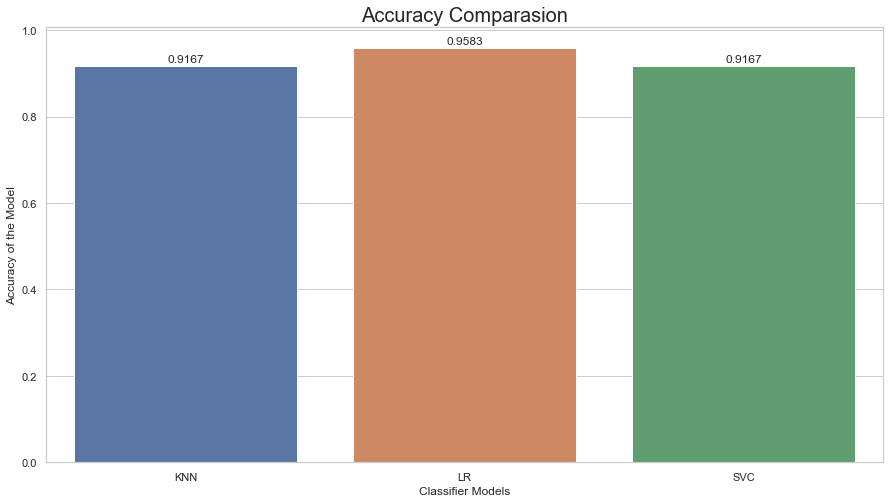

In [ ]:
import seaborn as sns
plt.figure(figsize=(15,8))
axis = sns.barplot(x = 'Name', y = 'Score', data =tr_split )
axis.set(xlabel='Classifier Models', ylabel='Accuracy of the Model')
plt.title("Accuracy Comparasion",fontsize="20")
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.01, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

In [ ]:
tr_split['Score'].max() 

0.9583333333333334

### So we can see and choose the best model for Prediction.

# End of the Code.